In [1]:
import numpy as np
import matplotlib.pyplot as plt
import umap

In [2]:
raw_data = np.load("KeplerSampleFullQ.npy")
def dmdtim(mjd,mag,ldmints,ldtints):
    dmdt=np.zeros(shape=(ldmints,ldtints))
    maxval = 255
    maxpts = len(mjd)*(len(mjd)-1)/2
    dmjd = []
    dmag = []

    for i in range(len(mjd)):
        for j in range(i+1,len(mjd)):
            dmjd.append(mjd[j]-mjd[i])
            dmag.append(mag[j]-mag[i])

    (sdmjd,sdmag) = zip(*sorted(zip(dmjd,dmag)))

    minmjdbin = 0
    for i in range(len(sdmjd)):
        mjdbin = minmjdbin
        for k in range(minmjdbin,ldtints):
            if sdmjd[i] > dtints[k]:
                mjdbin = k
        minmjdbin = mjdbin
        magbin = 0
        for k in range(ldmints):
            if sdmag[i] > dmints[k]:
                magbin = k
        dmdt[magbin,mjdbin] += 1

    return (maxval*dmdt/maxpts), dmjd, dmag

In [3]:
raw_data.shape

(2500, 3)

In [4]:
raw_data[0].shape

(3,)

In [5]:
# dmints = [-2,-1,-1.5,-1,-0.5,-0.25,-0.2,-0.15,-0.10, -0.07, -0.05, -0.03, -0.01, -0.05, 0, 0.05, 0.01, 0.03, 0.05, 0.07, 0.10, 0.15, 0.2, 0.25, 0.5, 1, 1.5, 2]


dmints = [-1, -0.7, -0.5, -0.35, -0.3, -0.25, -0.2, -0.15, -0.1, -0.05, -0.01, -0.005, -0.002, -0.001, 0, 0.001,  0.002, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.5, 1]





dtints = [1.0/1000, 1.0/500,2.0/500,1.0/145,2.0/145,3.0/145, 7.0/145,10.0/145, 20.0/145, 25.0/145, 30.0/145, 40.0/145,50.0/145,60.0/145, 70.0/145, 80.0/145, 90.0/145, 100.0/145, 120.0/145, 130.0/145, 140.0/145, 1.0, 1,25, 1.5, 2, 2.5,3.0]








In [6]:
print len(dmints)
print len(dtints)

28
28


In [7]:
normalized_x_flux = []
normalized_y_flux = []
for i, _ in enumerate(raw_data):
    if len(raw_data[i][1]) == 3534:
        normalized_x_flux.append(raw_data[i][0])
        normalized_y_flux.append(raw_data[i][1])
    
normalized_x_flux = np.array(normalized_x_flux)
normalized_y_flux = np.array(normalized_y_flux)

In [8]:
first_x_points = normalized_x_flux[:, :150]
first_y_points = normalized_y_flux[:, :150]

In [9]:
import random
start = random.randint(1, len(normalized_x_flux[0])-250)
random_x_points = normalized_x_flux[:, start: start+250]
random_y_points = normalized_y_flux[:, start: start+250]

In [10]:
test = dmdtim(first_x_points[0], first_y_points[0], 28, 28)

In [12]:
x,y,z = test
x.shape

(28, 28)

In [13]:
print np.min(y)
print np.min(z)
print np.max(y)
print np.max(z)

0.02043268916895613
-0.0008932352
3.085354306764202
0.0005532503


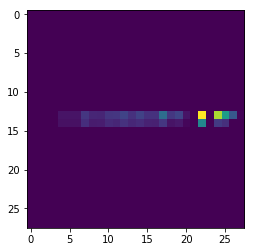

In [14]:
plt.imshow(x)
plt.show()

In [ ]:
first_obj = []
for i in range(500):
    if i % 50 == 0:
        print "ON ITERATION " + str(i)
    temp, y, z = dmdtim(first_x_points[i], first_y_points[i], 28, 28)
    first_obj.append(temp)
    np.save("first_full_3/first_" + str(i), temp)
first_obj = np.array(first_obj)
first_obj.shape

ON ITERATION 0
ON ITERATION 50
ON ITERATION 100
ON ITERATION 150
ON ITERATION 200
ON ITERATION 250
ON ITERATION 300
ON ITERATION 350
ON ITERATION 400


In [ ]:
dmdt_ex = np.load("first_full_3/first_99.npy")
plt.imshow(dmdt_ex)
plt.show()

In [ ]:
dmdt_ex.transpose().shape

In [ ]:
plt.imshow(dmdt_ex.transpose())
plt.show()

In [75]:
# finding better dm bounds
start = random.randint(1, len(normalized_x_flux[0])-400)
num = random.randint(1, len(normalized_x_flux)-100)
random_x_points = normalized_x_flux[num: num+100, start: start+400]
random_y_points = normalized_y_flux[num: num+100, start: start+400]

In [76]:
random_x_points.shape

(100, 400)

In [77]:
diffs_1 = []
diffs_2 = []
for i in range(len(random_x_points)):
    if i % 50 == 0:
        print "ON ITERATION " + str(i)
    temp, y, z = dmdtim(random_x_points[i], random_y_points[i], 28, 28)
    diffs_1.append(abs(np.max(y) - np.min(y)))
    diffs_2.append(abs(np.max(z) - np.min(z)))

ON ITERATION 0
ON ITERATION 50


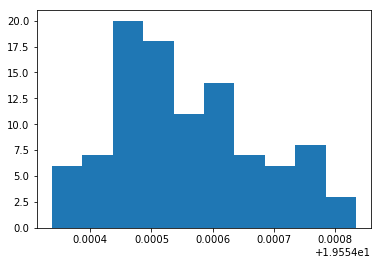

In [99]:
plt.hist(diffs_1)
plt.show()

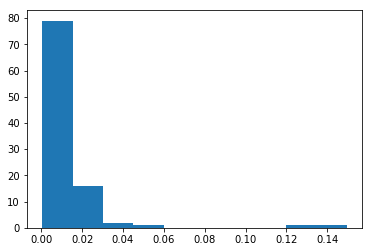

In [79]:
plt.hist(diffs_2)
plt.show()